<a target="_blank" href="https://colab.research.google.com/github/emipaz/Clase-Machine-Learning/blob/main/Clase%207/logistic_regression.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Regresi√≥n Log√≠stica

En el [post](https://sensioai.com/blog/014_clasificacion_binaria) anterior vimos c√≥mo utilizar el `Perceptr√≥n` para la tarea de clasificaci√≥n binaria. Para ello utilizamos una funci√≥n de activaci√≥n de tipo `step` (que nos da una salida de $0$ √≥ $1$) y entrenamos el `Perceptr√≥n` mediante el algoritmo de descenso por gradiente utilizando el error medio cuadr√°tico (MSE) como funci√≥n de p√©rdida. Sin embargo, en ocasiones no estamos interesados simplemente en conocer si un elemento en particular pertenece a una clase o no, si no tambi√©n el grado de confianza con el que nuestro modelo da cada predicci√≥n. Para ello necesitamos que nuestro `Perceptr√≥n` sea capaz de dar una `probabilidad` a la salida. Esta salida ser√° un valor entre $0$ y $1$ (a diferencia del anterior modelo en el que la salida era $0$ √≥ $1$) siendo $0$ la absoluta certeza de que el elemento en cuesti√≥n no pertenece a la clase que nos interesa y $1$ la absoluta certeza de que s√≠ pertenece. Un valor intermedio indicar√° una menor seguridad por parte del modelo (podemos utilizar esta informaci√≥n para mejorar el algoritmo a√±adiendo m√°s datos similares). Un valor de $0.5$ indicar√° que nuestro modelo no tiene ni la m√°s remota idea de c√≥mo clasificar el elemento utilizado como entrada. Este modelo tambi√©n se conoce por el nombre de `regresi√≥n log√≠stica` y vamos a ver c√≥mo se define, su implementaci√≥n y proceso de entrenamiento.

## Funci√≥n de Activaci√≥n

Seguimos trabajando con el mismo modelo de `Perceptr√≥n` que ya conocemos de los posts anteriores.

![](https://www.researchgate.net/profile/Shibani_Singh2/publication/321141639/figure/fig2/AS:572731935727616@1513561342872/Schematic-of-Rosenblatts-perceptron.png)

La principal diferencia es que, en el modelo de `regresi√≥n log√≠sitca`, utilizaremos una funci√≥n de activaci√≥n conocida como `Sigmoid`.

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

Como ya vimos en el post sobre [probabilidad](https://sensioai.com/blog/010_probabilidad), esta funci√≥n recibir√° como entrada un vector con la salida de nuestro perceptr√≥n para unos datos de entrada determinados y lo convertir√° en una probabilidad (un valor entre $0$ y $1$).

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

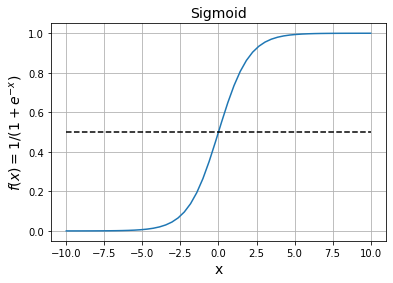

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10)
y = 1. / (1. + np.exp(-x))

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('$f(x) = 1/(1 + e^{-x})$', fontsize=14)
plt.title('Sigmoid', fontsize=14)
plt.plot(x, np.full(len(x), 0.5), '--k')
plt.show()

Como podemos ver, los valores muy negativos saturan a un valor de $0$ mientras que los valores muy positivos saturan a un valor de $1$. Cerca de $0$ la funci√≥n `sigmoid` nos dar√° una transici√≥n suave entre los dos valores l√≠mite.

## Funci√≥n de P√©rdida

Podr√≠amos intentar entrenar nuestro modelo de `regresi√≥n log√≠sitca` con la funci√≥n de p√©rdida que ya conocemos, *MSE*, y de hecho funcionar√≠a sin problemas ya que estamos forzando la salida a tomar el valor $0$ o $1$ en funci√≥n del *ground truth*. Sin embargo, vamos a introducir una nueva funci√≥n de p√©rdida muy utilizada cuando trabajamos con modelos probabil√≠sticos ya que dan como resultado un mejor proceso de optimizaci√≥n. Esta funci√≥n es conocida como *Binary Cross Entropy*, o tambi√©n la puedes encontrar por el nombre de *log loss*.

$$ J(\mathbf{w}) = - \frac{1}{N} \sum^{N}_{j=1} \left[ y^{(j)} log(\hat{y}^{(j)}) + (1-y^{(j)})log(1-\hat{y}^{(j)})\right] $$

Como puedes ver, cuando el *ground truth* sea $0$ s√≥lo intervendr√° el segundo t√©rmino, $log(1-\hat{y})$. En este caso, si la salida del modelo es correcta y nos da un valor cercano a $0$ obtendremos un valor de la funci√≥n de p√©rdida peque√±o. Sin embargo, si el modelo se equivoca y da una probabilidad alta, el valor de la funci√≥n de p√©rdida ser√° muy grande indicando un alto error (f√≠jate en el signo negativo al principio de la expresi√≥n, necesario ya que el l√≠mite cuando $x$ tiende a $0$ del logaritmo es $- \infty$ pero necesitamos valores positivos para indicar error). Lo mismo se aplica al caso contrario en el que el *ground truth* sea $1$, pero con el primer t√©rmino. 

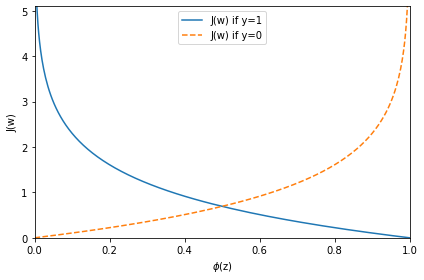

In [18]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) Si y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) Si y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_04.png', dpi=300)
plt.show()

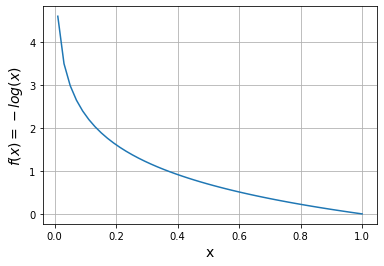

In [4]:
x = np.linspace(0.01, 1)
y =  -np.log(x)

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('$f(x) = - log(x)$', fontsize=14)
plt.show()

El motivo por el que usamos logaritmos en la funci√≥n de p√©rdida est√° relacionado con el concepto de `entrop√≠a`, una medida del grado de confianza asociado a una distribuci√≥n de probabilidad. En este post no vamos a entrar en detalle en este concepto, pero si est√°s interesado [aqu√≠](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) encontrar√°s m√°s referencias al respecto.

Como bien sabr√°s ya en este punto (si has seguido nuestros posts anteriores) la funci√≥n de p√©rdida no s√≥lo sirve para calcular el error de nuestro modelo, si no tambi√©n para su entrenamiento. Para ello necesitamos calcular la derivada de la funci√≥n de p√©rdida con respecto a los pesos de nuestro modelo. En este caso es un poco m√°s complicado que para la *MSE*, pero con un poco de matem√°ticas llegamos a la siguiente expresi√≥n:

$$ \frac{\partial J}{\partial w_i} =  \frac{1}{N} \sum^{N}_{j=1} (\sigma(\mathbf{w} \cdot \mathbf{x}^{(i)}) - y^{(i)})x^{(j)}_i $$

¬øTe resulta familiar? Es exactamente la misma expresi√≥n que obtenemos al calcular la derivada de la *MSE* en el caso del `Perceptr√≥n` con funci√≥n de activaci√≥n lineal que ya utilizamos para tareas de `regresi√≥n`. Esto nos simplifica las cosas a la hora de hacer nuestra implementaci√≥n.

## Implementaci√≥n

Vamos a mejorar la implementaci√≥n del `Perceptr√≥n` del post anterior para que ahora tambi√©n sea capaz de funcionar como un modelo de `regresi√≥n log√≠stica`.

In [5]:
# funciones de p√©rdida

def mse(y, y_hat):
    return np.mean((y_hat - y)**2)

def bce(y, y_hat):
    return - np.mean( y* np.log(y_hat) - (1 - y)* np.log(1 - y_hat))

# funciones de activaci√≥n

def linear(x):
    return x

def step(x):
    return x > 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Perceptron

class Perceptron():
    def __init__(self, size, activation, loss):
        self.w = np.random.randn(size) 
        self.ws = []
        self.activation = activation
        self.loss = loss
    
    def __call__(self, w, x):
        return self.activation(np.dot(x, w)) 

    def fit(self, x, y, epochs, lr):
        x = np.c_[np.ones(len(x)), x]
        for epoch in range(epochs):
            # Batch Gradient Descent
            y_hat = self(self.w, x)  
            # funci√≥n de p√©rdida 
            l = self.loss(y, y_hat)
            # derivadas
            dldh = (y_hat - y)
            dhdw = x
            dldw = np.dot(dldh, dhdw)
            # actualizar pesos
            self.w = self.w - lr*dldw
            # guardar pesos para animaci√≥n
            self.ws.append(self.w.copy())

Como puedes ver hemos definido diferentes funciones para cada una de las funciones de p√©rdida y de activaci√≥n que conocemos, y simplemente le diremos al `Perceptr√≥n` cuales utilizar al inicializarlo. De esta manera nuestro modelo ser√° capaz de resolver tanto tareas de `regresi√≥n` como de `clasificaci√≥n binaria`.

> ‚ö° Para hacer una implementaci√≥n todav√≠a m√°s vers√°til puedes probar a cambiar la funci√≥n `fit` para que funcione en modo `mini-batch`. En este [post](https://sensioai.com/blog/013_perceptron2) encontraras c√≥mo hacerlo.

## Entrenamiento

Ahora que ya tenemos todas las piezas en su lugar, vamos a utilizar nuestro `Perceptr√≥n` para la tarea de clasificaci√≥n binaria en el dataset Iris. Si no est√°s familizarizado con este dataset, te recomiendo que eches un vistazo a los posts anteriores en los que lo explicamos en detalle.

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

X.shape, y.shape

((150, 2), (150,))

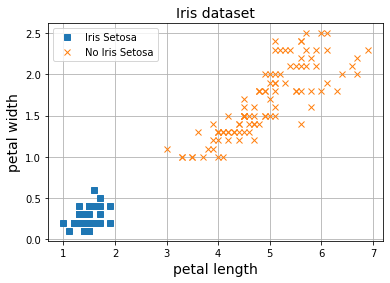

In [7]:
plt.plot(X[y==1, 0], X[y==1, 1], 's', label="Iris Setosa")
plt.plot(X[y==0, 0], X[y==0, 1], 'x', label="No Iris Setosa")
plt.grid()
plt.legend()
plt.xlabel('petal length', fontsize=14)
plt.ylabel('petal width', fontsize=14)
plt.title("Iris dataset", fontsize=14)
plt.show()

In [8]:
np.random.seed(42)

perceptron = Perceptron(3, sigmoid, bce)
epochs, lr = 20, 0.01
perceptron.fit(X, y, epochs, lr)

In [9]:
from matplotlib import animation, rc
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
rc('animation', html='html5')

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, autoscale_on=False)
def plot(i, axes = [0, 5, 0, 2], label="Iris Setosa"):
    ax.clear()
    w = perceptron.ws[i]
    tit = ax.set_title(f"Epoch {i+1}", fontsize=14)
    x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
            np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    X_new = np.c_[np.ones(len(X_new)), X_new] 
    y_predict = perceptron(w, X_new)
    zz = y_predict.reshape(x0.shape)
    ax.plot(X[y==0, 0], X[y==0, 1], "bs", label=f"No {label}")
    ax.plot(X[y==1, 0], X[y==1, 1], "yo", label=label)
    ax.contourf(x0, x1, zz, cmap=custom_cmap)
    ax.set_xlabel("Petal length", fontsize=14)
    ax.set_ylabel("Petal width", fontsize=14)
    ax.legend(loc="lower right", fontsize=14)
    ax.axis(axes)
    return ax

anim = animation.FuncAnimation(fig, plot, frames=epochs, interval=200)
plt.close()
anim

Como podemos ver, nuestro modelo es capaz de converger a una soluci√≥n √≥ptima que separa las dos clases.

> üí° Prueba a cambiar la funci√≥n de activaci√≥n y de p√©rdida para ver si puedes reprodcir los mismos resultados.

Ahora podemos usar nuestro modelo entrenado para asignar probabilidades de que una flor sea del tipo Iris Setosa a partir de la longitus y el ancho de sus p√©talos. 

In [10]:
w = perceptron.ws[-1]
w

array([ 3.1121193 , -1.14317047, -0.70370935])

In [11]:
x_new = [1, 2, 0.5]
y_pred = perceptron(w, x_new)
y_pred # Iris Setosa

0.6163120194730394

In [12]:
x_new = [1, 1, 0.5]
y_pred = perceptron(w, x_new)
y_pred # Iris Setosa

0.8343939887777257

In [13]:
x_new = [1, 3, 0.5]
y_pred = perceptron(w, x_new)
y_pred # No Iris Setosa

0.33866551968712205

In [14]:
x_new = [1, 4, 0.5]
y_pred = perceptron(w, x_new)
y_pred # No Iris Setosa

0.14034623285805609

Como puedes observar, el modelo est√° m√°s seguro cuanto m√°s nos alejamos de la frontera de decisi√≥n (valores m√°s cercanos a $0$ o $1$). Sin embargo, cuanto m√°s cerca de la frontera de decisi√≥n nos encontramos, el modelo est√° menos seguro dando resultados m√°s cercanos a $0.5$. ¬øC√≥mo asignamos una clase u otra entonces? Lo m√°s com√∫n es decidir un valor de corte, `threshold`, a partir del cual asignaremos una clase u otra. El valor m√°s com√∫n es el de $0.5$ (cualquier valor por encima ser√° asignado a la clase en cuesti√≥n). El valor de este `threshold` puede modificarse en cualquier caso para adaptarnos a los criterios de dise√±o buscados, el ratio entre `falsos positivos` y `falsos negativos`. En posts futuros entraremos en detalle en este asunto, ya que es muy importante sobretodo en aplicaciones sensibles como sistemas de ayuda al diagn√≥stico m√©dico, por ejemplo.

## Limitaciones

El modelo de `regresi√≥n log√≠stica` sigue teniendo las mismas limitaciones que encontramos en todas las aplicaciones del `Perceptr√≥n`, y es que no va a ser capaz de proveer de una buena soluci√≥n cuando nuestros datos no sean f√°cilmente separables por una l√≠nea recta.

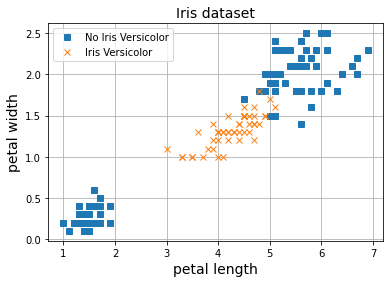

In [15]:
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 1).astype(np.int)

plt.plot(X[y==0, 0], X[y==0, 1], 's', label="No Iris Versicolor")
plt.plot(X[y==1, 0], X[y==1, 1], 'x', label="Iris Versicolor")
plt.grid()
plt.legend()
plt.xlabel('petal length', fontsize=14)
plt.ylabel('petal width', fontsize=14)
plt.title("Iris dataset", fontsize=14)
plt.show()

In [16]:
np.random.seed(20)

perceptron = Perceptron(3, sigmoid, bce)
epochs, lr = 40, 0.01
perceptron.fit(X, y, epochs, lr)

In [17]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, autoscale_on=False)
def plot(i, axes = [0.5, 7.3, 0, 2.8], label="Iris Versicolor"):
    ax.clear()
    w = perceptron.ws[i]
    tit = ax.set_title(f"Epoch {i+1}", fontsize=14)
    x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
            np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    X_new = np.c_[np.ones(len(X_new)), X_new] 
    y_predict = perceptron(w, X_new)
    zz = y_predict.reshape(x0.shape)
    ax.plot(X[y==0, 0], X[y==0, 1], "bs", label=f"No {label}")
    ax.plot(X[y==1, 0], X[y==1, 1], "yo", label=label)
    ax.contourf(x0, x1, zz, cmap=custom_cmap)
    ax.set_xlabel("Petal length", fontsize=14)
    ax.set_ylabel("Petal width", fontsize=14)
    ax.legend(loc="lower right", fontsize=14)
    ax.axis(axes)
    return ax

anim = animation.FuncAnimation(fig, plot, frames=epochs, interval=200)
plt.close()
anim

## Resumen

En este post hemos introducido el modelo de `regresi√≥n log√≠stica`. C√≥mo hemos visto, este modelo no es m√°s que nuestro ya conocido `Perceptr√≥n` con una funci√≥n de activaci√≥n de tipo `Sigmoid` entrenado con la funci√≥n de activaci√≥n *log-loss*. De esta manera, nuestro modelo ahora ser√° capaz no s√≥lo de llevar a cabo la tarea de `clasificaci√≥n binaria` si no tambi√©n de darnos el grado de confianza con el que nos proporciona la predicci√≥n. Esto lo conseguimos gracias a la funci√≥n de activaci√≥n, que convierte la salida del `Perceptr√≥n` en una probabilidad (un valor entre $0$ y $1$). Tambi√©n hemos mejorado nuestra actual implementaci√≥n del `Perceptr√≥n` de manera que sea capaz de llevar a cabo todas las aplicaciones que hemos visto hasta ahora. Por √∫ltimo, seguimos observando las mismas limitaciones en nuestro modelo, y es que s√≥lo funciona bien cuando los datos pueden ser separados f√°cilmente por una l√≠nea. En el caso contrario, necesitaremos modelos m√°s sofisticados que veremos en futuros posts.